In [177]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import tree
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample

Lê o arquivo

In [178]:
df = pd.read_csv('../Dados/asteroides.csv') 
df

,velocidade_relativa_kms,velocidade_relativa_kmh,Orbit Uncertainity,inclinacao,periodo_da_orbita,distancia_perielio,anomalia_media,movimento_medio,perigo
0,6.115834,22017.003799,5,6.025981,609.599786,0.808259,264.837533,0.590551,1
1,18.113985,65210.346095,3,28.412996,425.869294,0.718200,173.741112,0.845330,0
2,7.590711,27326.560182,0,4.237961,643.580228,0.950791,292.893654,0.559371,1
3,11.173874,40225.948191,6,7.905894,514.082140,0.983902,68.741007,0.700277,0
4,9.840831,35426.991794,1,16.793382,495.597821,0.967687,135.142133,0.726395,1
...,...,...,...,...,...,...,...,...,...
4682,22.154265,79755.354273,8,39.880491,457.179984,0.741558,304.306025,0.787436,0
4683,3.225150,11610.539577,6,5.360249,407.185767,0.996434,282.978786,0.884117,0
4684,7.191642,25889.910626,6,4.405467,690.054279,0.965760,203.501147,0.521698,0
4685,11.352090,40867.522309,5,21.080244,662.048343,1.185467,203.524965,0.543767,0


Separa a coluna perigo do resto e coloca ela na variavel 'y' e o resto na 'x'

In [179]:
x = df.drop('perigo', axis=1)
y = df['perigo']
x

,velocidade_relativa_kms,velocidade_relativa_kmh,Orbit Uncertainity,inclinacao,periodo_da_orbita,distancia_perielio,anomalia_media,movimento_medio
0,6.115834,22017.003799,5,6.025981,609.599786,0.808259,264.837533,0.590551
1,18.113985,65210.346095,3,28.412996,425.869294,0.718200,173.741112,0.845330
2,7.590711,27326.560182,0,4.237961,643.580228,0.950791,292.893654,0.559371
3,11.173874,40225.948191,6,7.905894,514.082140,0.983902,68.741007,0.700277
4,9.840831,35426.991794,1,16.793382,495.597821,0.967687,135.142133,0.726395
...,...,...,...,...,...,...,...,...
4682,22.154265,79755.354273,8,39.880491,457.179984,0.741558,304.306025,0.787436
4683,3.225150,11610.539577,6,5.360249,407.185767,0.996434,282.978786,0.884117
4684,7.191642,25889.910626,6,4.405467,690.054279,0.965760,203.501147,0.521698
4685,11.352090,40867.522309,5,21.080244,662.048343,1.185467,203.524965,0.543767


In [180]:
y

0       1
1       0
2       1
3       0
4       1
       ..
4682    0
4683    0
4684    0
4685    0
4686    0
Name: perigo, Length: 4687, dtype: int64

Balanceando as classes usando oversampling (SMOTE) ou undersamplingB(melhor foi o udersamplingB)

In [181]:
df_majority = df[df.perigo == 0]
df_minority = df[df.perigo == 1]

df_minority_upsampled = resample(df_minority, 
                                     replace=True,     # sample with replacement
                                     n_samples=len(df_majority),    # to match majority class
                                     random_state=42) # reproducible results

df_balanced = pd.concat([df_majority, df_minority_upsampled])

x_balanced = df_balanced.drop('perigo', axis=1)
y_balanced = df_balanced['perigo']
   

Separa em casos de treino e caso de teste, sendo 90% pra treino e 10% para testar a eficiencia

In [182]:
x_train, x_test, y_train, y_test = train_test_split(x_balanced, y_balanced, test_size=0.1, random_state=42)

tratar o dados para melhor utilização

In [183]:
# Normalizar os dados
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

Agora começa os classificadores, primeiro arvore de descisão:
Cria a arvore de decisão(padrão)

In [202]:
clf = tree.DecisionTreeClassifier()

treina a arvore com os casos de treino

In [204]:
clf.fit(x_train,y_train)

DecisionTreeClassifier()

testa a arvore usando os casos de testes falando pra ela tentar acertar qual se aqueles dados são perigoso ou não

In [205]:
y_pred = clf.predict(x_test)

faz o relatório de métricas

In [206]:
target_names = ['não perigoso', 'perigoso'] #troca o 0 e 1 por não perigos e perigoso para ficar mais bonito
print(classification_report(y_test, y_pred, target_names=target_names))#compara o que estava no arquivo(o certo) com o que a arvore tentou acertar e mostra isso

              precision    recall  f1-score   support

não perigoso       0.99      0.89      0.94       385
    perigoso       0.91      1.00      0.95       402

    accuracy                           0.95       787
   macro avg       0.95      0.94      0.95       787
weighted avg       0.95      0.95      0.95       787



faz a matriz de confusão

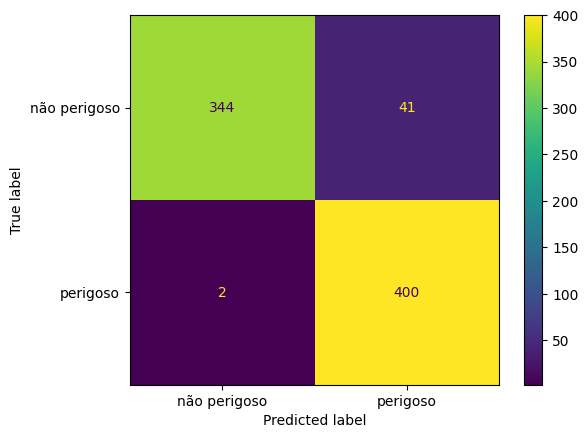

In [207]:
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)#cria a matriz de confusão comparando o que estava no arquivo(o certo) com o que a arvore tentou acertar 
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['não perigoso', 'perigoso'])
disp.plot()
plt.show()

Agora modificando os valores dos parametros da arvore buscando maior valores de acerto no geral(accuracy)

              precision    recall  f1-score   support

não perigoso       1.00      0.90      0.95       385
    perigoso       0.91      1.00      0.95       402

    accuracy                           0.95       787
   macro avg       0.96      0.95      0.95       787
weighted avg       0.95      0.95      0.95       787



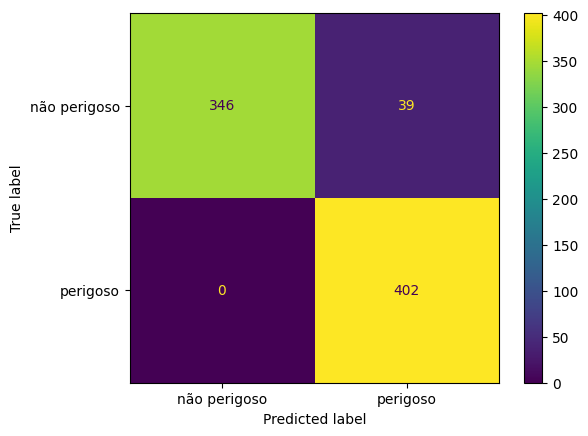

In [189]:
clf = tree.DecisionTreeClassifier(
        criterion= 'entropy',
        max_depth= 40, 
        min_samples_leaf= 1,
        min_samples_split= 2, 
        splitter= 'best',
        #random_state=42,
        #class_weight='balanced'
)

#treina a arvore
clf.fit(x_train,y_train)
    
#faz o predict das amostras que a gente deixou como teste
y_pred = clf.predict(x_test)
    
#faz o relatório de métricas
target_names = ['não perigoso', 'perigoso']
print(classification_report(y_test, y_pred, target_names=target_names))
    
#faz a matriz de confusão
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['não perigoso', 'perigoso'])
disp.plot()
plt.show()

Agora modificando os valores dos parametros da arvore buscando maior valores de acerto em identificar perigo(perigo - recall)

              precision    recall  f1-score   support

não perigoso       1.00      0.90      0.95       385
    perigoso       0.92      1.00      0.96       402

    accuracy                           0.95       787
   macro avg       0.96      0.95      0.95       787
weighted avg       0.96      0.95      0.95       787



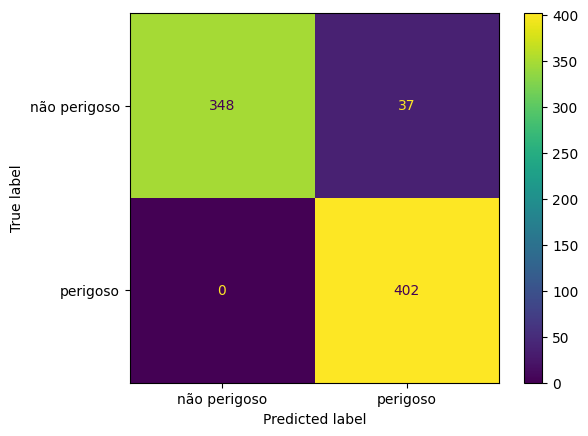

In [190]:
clf = tree.DecisionTreeClassifier(
        criterion= 'entropy',
        max_depth= 40, 
        min_samples_leaf= 1,
        min_samples_split= 2, 
        splitter= 'best',
        random_state=42,
        class_weight='balanced'
)

#treina a arvore
clf.fit(x_train,y_train)
    
#faz o predict das amostras que a gente deixou como teste
y_pred = clf.predict(x_test)
    
#faz o relatório de métricas
target_names = ['não perigoso', 'perigoso']
print(classification_report(y_test, y_pred, target_names=target_names))
    
#faz a matriz de confusão
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['não perigoso', 'perigoso'])
disp.plot()
plt.show()

segundo classificador, KNeighborsClassifier
Cria o KNN(padrão)

In [191]:
knn = KNeighborsClassifier()

treina o KNN

In [192]:
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [193]:
y_pred = knn.predict(x_test)

In [194]:
#faz o relatório de métricas
target_names = ['não perigoso', 'perigoso']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

não perigoso       0.96      0.76      0.85       385
    perigoso       0.81      0.97      0.88       402

    accuracy                           0.87       787
   macro avg       0.89      0.87      0.87       787
weighted avg       0.88      0.87      0.87       787



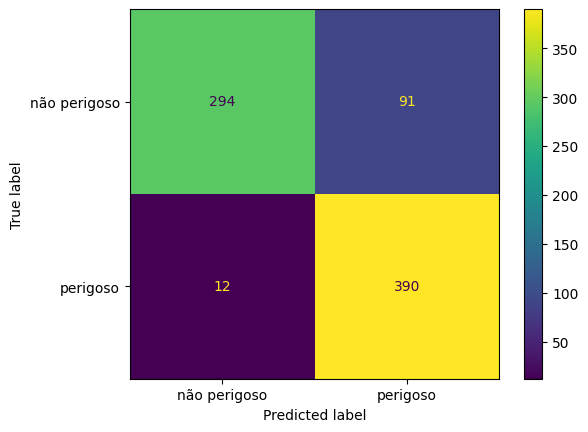

In [195]:
#faz a matriz de confusão
cm = confusion_matrix(y_test, y_pred, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['não perigoso', 'perigoso'])
disp.plot()
plt.show()

              precision    recall  f1-score   support

não perigoso       1.00      0.83      0.91       385
    perigoso       0.86      1.00      0.93       402

    accuracy                           0.92       787
   macro avg       0.93      0.92      0.92       787
weighted avg       0.93      0.92      0.92       787



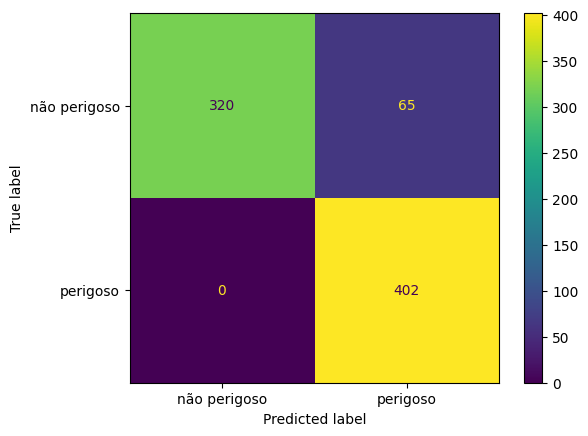

In [196]:
knn = KNeighborsClassifier(metric='manhattan',n_neighbors=3,weights='distance')
# Treine o classificador
knn.fit(x_train, y_train)

#Faça previsões no conjunto de teste
y_pred = knn.predict(x_test)

#faz o relatório de métricas
target_names = ['não perigoso', 'perigoso']
print(classification_report(y_test, y_pred, target_names=target_names))

#faz a matriz de confusão
cm = confusion_matrix(y_test, y_pred, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['não perigoso', 'perigoso'])
disp.plot()
plt.show()